## Checking the implementation

We run the algorithm with order 2 tensors (i.e. matrices) to check our implementation does what we expect it to do. Here we plot some graphs showing the achieved correlation.

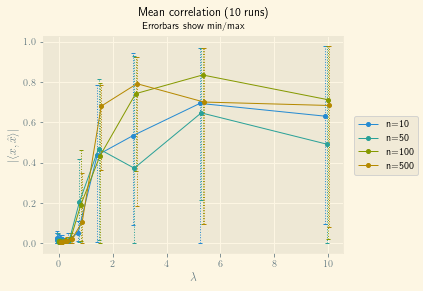

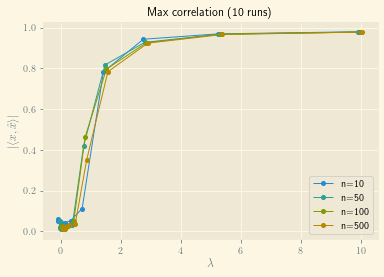

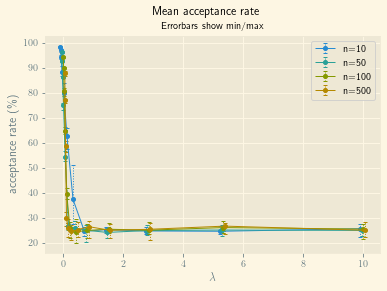

In [2]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os

# Loading the data
run = "corr_11-05-2022_22:30"
filename = f"./data/{run}.pkl"
infile = open(filename, "rb")
results = pickle.load(infile)
infile.close()

if not os.path.exists(f"figures/{run}"):
    os.makedirs(f"figures/{run}")

dims = list(set([l["dim"] for l in results]))
dims.sort()
n_dims = len(dims)

lambdas = list(set([l["lambda"] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()
n_lambdas = len(lambdas)

correlations = [l["correlations"] for l in results]
final_correlations = np.abs(
    [run[-1] for correlation_list in correlations for run in correlation_list]
).reshape(n_lambdas * n_dims, -1)

acceptance_rates = np.array([l["acceptance_rates"] for l in results])

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_runs = acceptance_rates.shape[1]


# plotting
with plt.style.context("Solarize_Light2"):
    plt.rc("text", usetex=True)

    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_runs} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/{run}/correlations.png", dpi=900)

    # max correlation plot
    plt.figure()

    for i in range(n_dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            (i - 2) * 0.05 + lambdas,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs)", fontsize=12)
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.savefig(f"figures/{run}/correlations_max.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(n_dims):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/{run}/acceptance_rates.png", dpi=900)


Now we plot some graphs about the time to convergence, in the case where the algorithm was successful. Here, we mean by being successful that the final correlation was above some arbitrary threshold. We take $0.6$ as our threshold here.

In [9]:
np.nanmean(n_iterations,  axis=1)[i * n_lambdas : (i + 1) * n_lambdas]


/tmp/ipykernel_1520765/69801086.py:1: RuntimeWarning: Mean of empty slice
  np.nanmean(n_iterations,  axis=1)[i * n_lambdas : (i + 1) * n_lambdas]


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, 85.625     , 72.75      ,
       95.71428571, 76.71428571])

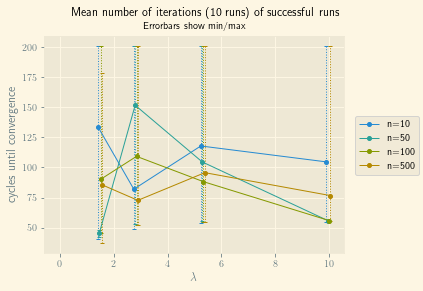

In [13]:
import warnings

warnings.simplefilter("ignore")

n_iterations = np.array(
    [len(run) if np.abs(run[-1]) >= 0.6 else np.nan for correlation_list in correlations for run in correlation_list]
).reshape(n_lambdas * n_dims, -1)

# plotting
with plt.style.context("Solarize_Light2"):
    plt.rc("text", usetex=True)

    # number of iterations plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = np.nanmean(n_iterations,  axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = np.nanmin(n_iterations,  axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = np.nanmax(n_iterations,  axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean number of iterations (over {n_runs} runs) of successful runs", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"cycles until convergence")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/{run}/n_iterations.png", dpi=900)

## Order 3

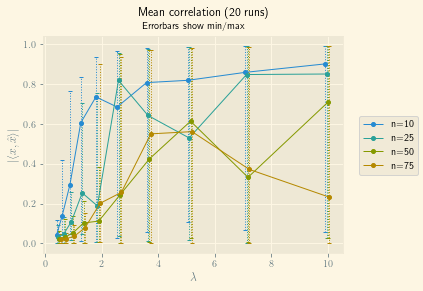

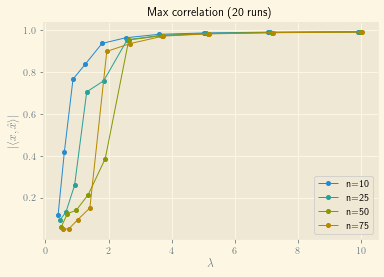

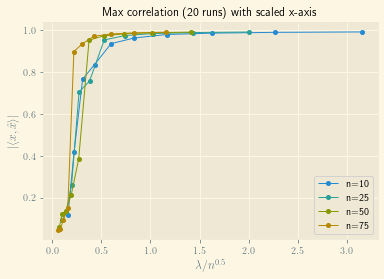

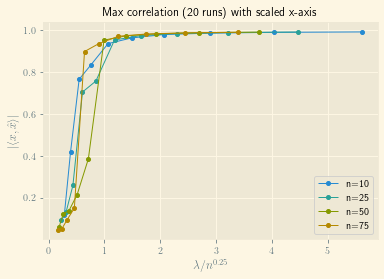

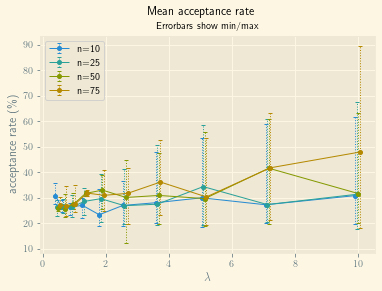

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import pickle
import os

# Loading the data
run = "corr__07-05-2022_21:34"
filename = f"./data/{run}.pkl"
infile = open(filename, "rb")
results = pickle.load(infile)
infile.close()

if not os.path.exists(f"figures/{run}"):
    os.makedirs(f"figures/{run}")

dims = list(set([l["dim"] for l in results]))
dims.sort()

lambdas = list(set([l["lambda"] for l in results]))
lambdas = np.array(lambdas)
lambdas.sort()

n_dims = len(dims)
n_lambdas = len(lambdas)

correlations = [l["correlations"] for l in results]
final_correlations = np.abs(
    [run[-1] for correlation_list in correlations for run in correlation_list]
).reshape(n_lambdas * n_dims, -1)

acceptance_rates = np.array([l["acceptance_rates"] for l in results])

labels = {i: f"n={dim}" for i, dim in enumerate(dims)}
n_runs = acceptance_rates.shape[1]


# plotting
with plt.style.context("Solarize_Light2"):
    plt.rc("text", usetex=True)
    # correlation plot
    fig, axes = plt.subplots(nrows=1)

    for i in range(n_dims):
        means = final_correlations.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = final_correlations.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = final_correlations.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = axes.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle(f"Mean correlation ({n_runs} runs)", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)
    axes.set_xlabel(r"$\lambda$")
    axes.set_ylabel(r"$|\langle x, \hat{x}\rangle |$")

    handles, labels = axes.get_legend_handles_labels()
    handles = [
        h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles
    ]

    fig.legend(handles, labels, loc=7)
    fig.subplots_adjust(right=0.82)
    plt.savefig(f"figures/{run}/correlations.png", dpi=900)

    # max correlation plot
    plt.figure()

    for i in range(n_dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            (i - 2) * 0.05 + lambdas,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs)", fontsize=12)
    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    plt.savefig(f"figures/{run}/correlations_max.png", dpi=900)

    # max correlation plot with scaled x-axis
    plt.figure()

    for i, dim in enumerate(dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            lambdas / dim**0.5,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs) with scaled x-axis", fontsize=12)
    plt.xlabel(r"$\lambda/n^{0.5}$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    # plt.savefig(f"figures/{run}/correlations_scaledaxis_0.5.png", dpi=900)

    # max correlation plot with scaled x-axis
    plt.figure()

    for i, dim in enumerate(dims):
        maxs = np.abs(final_correlations).max(axis=1)[
            i * n_lambdas : (i + 1) * n_lambdas
        ]
        eb = plt.plot(
            lambdas / dim**0.25,
            maxs,
            "o-",
            label=labels[i],
            linewidth=1,
            markersize=4,
        )
    plt.title(f"Max correlation ({n_runs} runs) with scaled x-axis", fontsize=12)
    plt.xlabel(r"$\lambda/n^{0.25}$")
    plt.ylabel(r"$|\langle x, \hat{x}\rangle |$")
    plt.legend()
    # plt.savefig(f"figures/{run}/correlations_scaledaxis_0.25.png", dpi=900)

    # acceptance rate plot
    plt.figure()

    for i in range(n_dims):
        means = 100 * acceptance_rates.mean(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        mins = 100 * acceptance_rates.min(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        maxs = 100 * acceptance_rates.max(axis=1)[i * n_lambdas : (i + 1) * n_lambdas]
        eb = plt.errorbar(
            (i - 2) * 0.05 + lambdas,
            means,
            yerr=[means - mins, maxs - means],
            label=labels[i],
            fmt="o-",
            linewidth=1,
            markersize=4,
            capsize=2,
            elinewidth=1,
        )
        eb[-1][0].set_linestyle(":")
    plt.suptitle("Mean acceptance rate", fontsize=12)
    plt.title("Errorbars show min/max", fontsize=10)

    plt.xlabel(r"$\lambda$")
    plt.ylabel(r"acceptance rate (\%)")

    plt.legend()
    plt.savefig(f"figures/{run}/acceptance_rates.png", dpi=900)
